In [1]:
import numpy as np
import torch
import scipy.sparse as sp
import pandas as pd
import math
import random
from sklearn.preprocessing import minmax_scale, scale
import matplotlib.pyplot as plt
from sklearn import metrics
from itertools import cycle

/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [50]:
data = np.load('./ROC_plot1.npy', allow_pickle=True).item()

In [51]:
names = list(data.keys())
names

['peryton_sign2',
 'peryton_sign1',
 'greet_embedding_peryton',
 'trustsgcn_embedding_peryton',
 'gatmda_embedding_peryton',
 'slgnn_embedding_peryton']

In [52]:
names_1 = ['sign2', 'sign1', 'greet', 'trustsgcn', 'gatmda', 'slgnn']


In [15]:
# roc_plot1 = {item:data[item] for item in names[3:]}
# roc_plot2 = {item:data[item] for item in names[:3]}
# roc_plot1.update(roc_plot2)
# roc_plot1.keys()
# np.save('./ROC_plot.npy', roc_plot1)


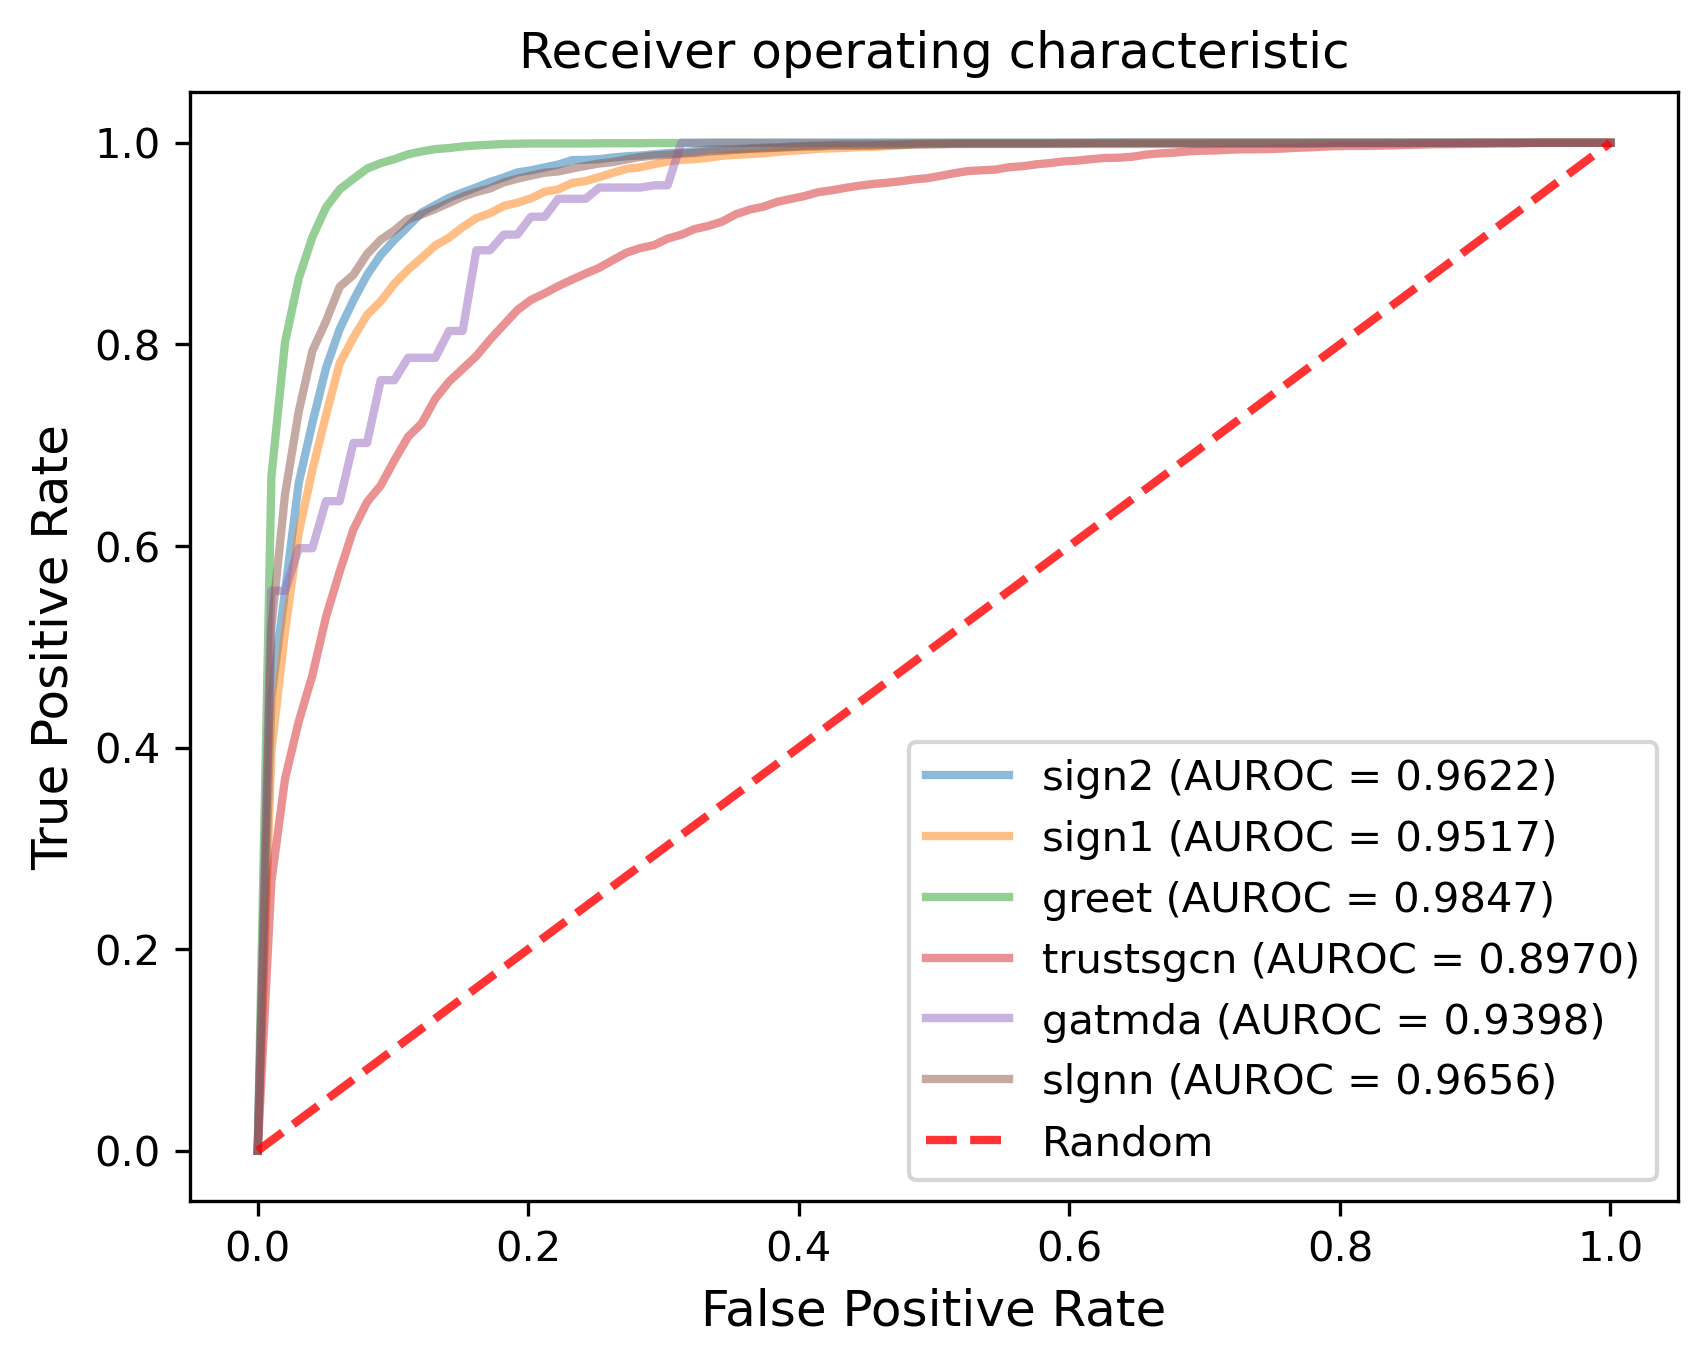

In [54]:
c = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',  # 使用颜色编码定义颜色
            '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#001e36'])
fig, ax = plt.subplots(dpi=300) # 指定大小分辨率等，相当于画纸
for i, (item, color) in enumerate(zip(names, c)):
    ax.plot(data[item][0], data[item][1], color=color, lw=2, alpha=.5,
            label=str(names_1[i]) + ' (AUROC = %0.4f)' % data[item][2])
    
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random', alpha=.8)
ax.set_xlabel('False Positive Rate', size=12)
ax.set_ylabel('True Positive Rate', size=12)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.savefig('./ROC1.tiff', dpi=300)

In [46]:
data = np.load('./10K_label_score_2000_64_4.npy').reshape(20, -1)
label = data[:10, :]
score = data[10:, :]

In [47]:
ROC_plot = np.load('./ROC_plot.npy', allow_pickle=True).item()

In [48]:
ROC_plot.keys()

dict_keys(['peryton_sign2', 'peryton_sign1', 'greet_embedding_peryton', 'trustsgcn_embedding_peryton', 'gatmda_embedding_peryton', 'slgnn_embedding_peryton'])

In [15]:
test_label_score = {}
for i in range(10):
    test_label_score['fold '+str(i)] = [label[i], score[i]]
# np.save('./gatmda_embedding_peryton_folds.npy', test_label_score)


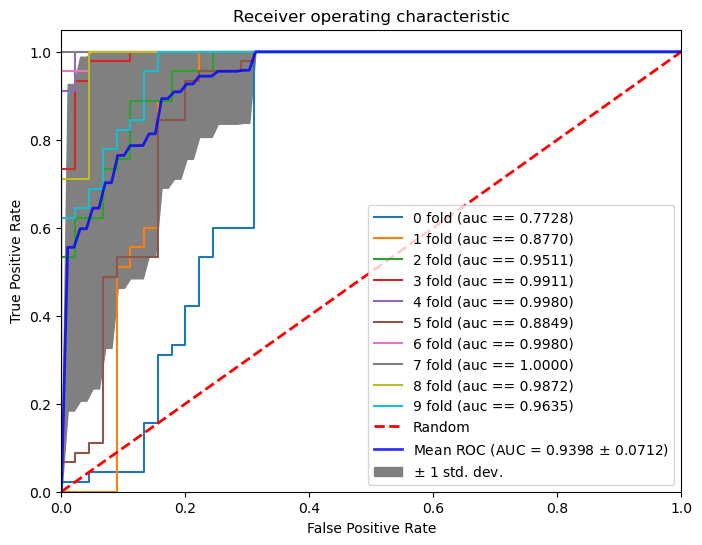

In [49]:
label = data[:10, :]
score = data[10:, :]
#############################################################
# 10 fold ROC
fig = plt.figure(figsize=(8,6))
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
for i in range(10):
    fpr, tpr, _ = metrics.roc_curve(label[i], score[i])
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, label='{} fold (auc == {:.4f})'.format(i, roc_auc))
plt.plot([0, 1], [0, 1], lw=2, c='r', label='Random', linestyle='--')

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey',
                 label=r'$\pm$ 1 std. dev.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ROC_plot['gatmda_embedding_peryton'] = (mean_fpr, mean_tpr, mean_auc, std_auc)
np.save('./ROC_plot1.npy', ROC_plot)